In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
# first-order reaction A→P
k = lambda T: 1e13 * np.exp(-12000 / T)  # 1/s

VR      = 10    # m3
CA0     = 5     # kmol/m3
v       = 1e-2  # m3/s
T0      = 300   # K
delta_H = -2e7  # J/kmol
rho     = 850   # kg/m3
cP      = 2200  # J/(kg*K)

tau = VR / v

In [3]:
Nt = 1000
t_max = 20000
dt = t_max / (Nt - 1)

In [4]:
def residual(F):
    CA, T = F[0], F[1]
    dT = np.zeros_like(T)
    dCA = np.zeros_like(CA)

    CA[0] = 0
    T[0] = T0

    dT[0] = -1.5 / dt * T[0] + 2 / dt * T[1] - 0.5 / dt * T[2]
    dT[1:-1] = (T[2:] - T[:-2]) / (2 * dt)
    dT[-1] = 1.5 / dt * T[-1] - 2 / dt * T[-2] + 0.5 / dt * T[-3]

    dCA[0] = -1.5 / dt * CA[0] + 2 / dt * CA[1] - 0.5 / dt * CA[2]
    dCA[1:-1] = (CA[2:] - CA[:-2]) / (2 * dt)
    dCA[-1] = 1.5 / dt * CA[-1] - 2 / dt * CA[-2] + 0.5 / dt * CA[-3]

    return [(CA0 - CA) / tau - k(T) * CA - dCA,
            -delta_H * k(T) * CA / (rho * cP) + (T0 - T) / tau - dT]

In [5]:
CA = np.zeros(Nt)
T = np.full(Nt, T0)
sol = opt.root(residual, [CA, T], method='krylov', options={'disp': True, 'maxiter': 1000})

0:  |F(x)| = 0.00915406; step 1
1:  |F(x)| = 0.0051317; step 1
2:  |F(x)| = 0.00332891; step 1
3:  |F(x)| = 0.00311961; step 1
4:  |F(x)| = 0.00162407; step 1
5:  |F(x)| = 0.000941801; step 1
6:  |F(x)| = 0.000585855; step 1
7:  |F(x)| = 0.000481427; step 1
8:  |F(x)| = 0.000341085; step 1
9:  |F(x)| = 0.000251045; step 1
10:  |F(x)| = 0.000160793; step 1
11:  |F(x)| = 0.000116286; step 1
12:  |F(x)| = 7.3999e-05; step 1
13:  |F(x)| = 4.64469e-05; step 1
14:  |F(x)| = 3.17183e-05; step 1
15:  |F(x)| = 2.11571e-05; step 1
16:  |F(x)| = 1.39748e-05; step 1
17:  |F(x)| = 1.0381e-05; step 1
18:  |F(x)| = 6.81235e-06; step 1
19:  |F(x)| = 4.51847e-06; step 1


4.692487737619847 303.28886931166545


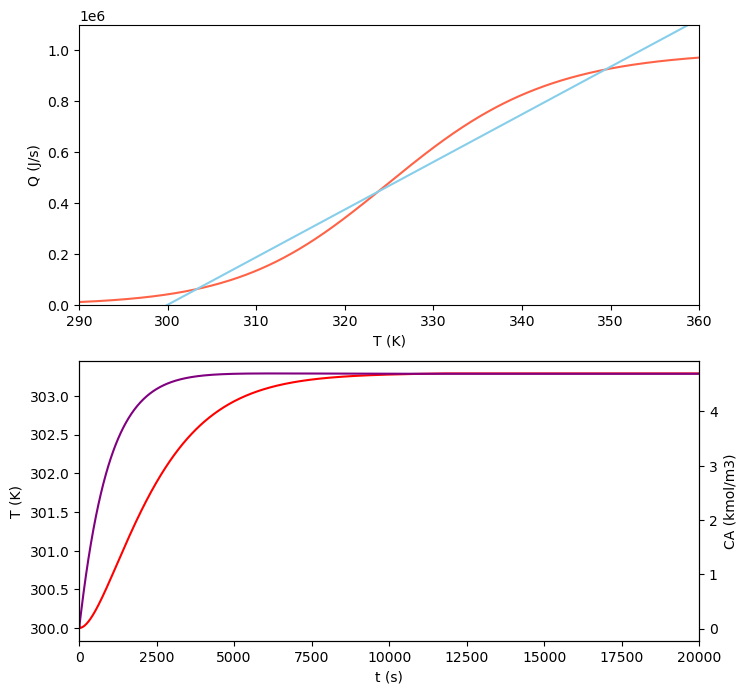

In [6]:
fig = plt.figure(figsize=(8, 8))
axQ = fig.add_subplot(211)
axT = fig.add_subplot(212)

T = np.linspace(290, 400, Nt)
Q_gen = -delta_H * VR * k(T) * CA0 / (1 + k(T) * VR / v)
Q_rem = v * rho * cP * (T - T0)
axQ.plot(T, Q_gen, color='tomato')
axQ.plot(T, Q_rem, color='skyblue')
axQ.set(xlabel='T (K)', ylabel='Q (J/s)',
        xlim=(290, 360), ylim=(0, 1.1e6))

t = np.linspace(0, t_max, Nt)
axT.plot(t, sol.x[1], color='red')
axC = axT.twinx()
axC.plot(t, sol.x[0], color='purple')
axT.set(xlabel='t (s)', ylabel='T (K)',
        xlim=(0, t_max))
axC.set(ylabel='CA (kmol/m3)')
print(sol.x[0][-1], sol.x[1][-1])